In [2]:
import pandas as pd

df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

df_flood_fill_time = pd.read_csv('results/csv_files/competition/final/flood_fill_time.csv')
df_bfs_time = pd.read_csv('results/csv_files/competition/final/bfs_time.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs_classical = [
    ('FloodFill', df_flood_fill),
    ('BFS', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill', df_flood_fill),
    ('BFS', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Arbitrary)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Time)', df_dyna_qlearning_time),
    ('Dyna-Q SARSA (Arbitrary)', dynaq_sarsa_arbt),
    ('Dyna-Q SARSA (Time)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

In [171]:
dfs_RL = [
    ('FloodFill', df_flood_fill),
    ('BFS', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Arbitrary)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Time)', df_dyna_qlearning_time),
    ('Dyna-Q SARSA (Arbitrary)', dynaq_sarsa_arbt),
    ('Dyna-Q SARSA (Time)', dynaq_sarsa_time),
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs_RL:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list)

df = df_combined_RL.set_index('Algorithm')

In [172]:
df = df['Path Time (s)'].groupby('Algorithm').mean()

In [177]:
pd.DataFrame(df)

,Path Time (s)
Algorithm,
A*,21.611806
BFS,21.611806
Dijkstra,21.611806
Dyna-Q Q-learning (Arbitrary),21.086495
Dyna-Q Q-learning (Time),21.237822
Dyna-Q SARSA (Arbitrary),21.047523
Dyna-Q SARSA (Time),21.322834
FloodFill,21.185855
Q-learning,21.555242


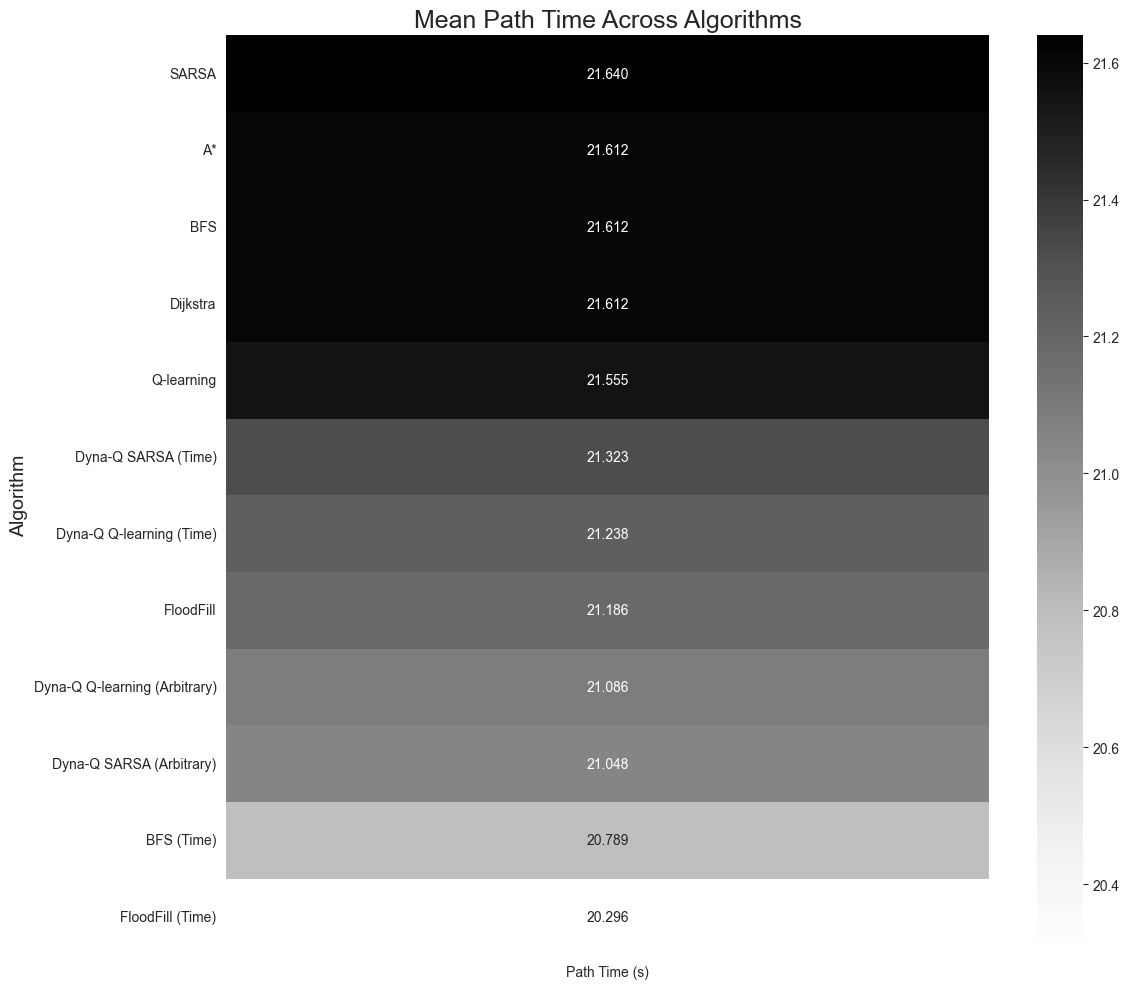

In [4]:
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])

df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(df_pivot, annot=True, fmt=".3f", cmap='Greys', cbar_kws={'label': ''})

plt.title('Mean Path Time Across Algorithms', fontsize=18)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

plt.savefig('results/figures/results-section/path_times_comparison.pdf', format='pdf')

plt.show()


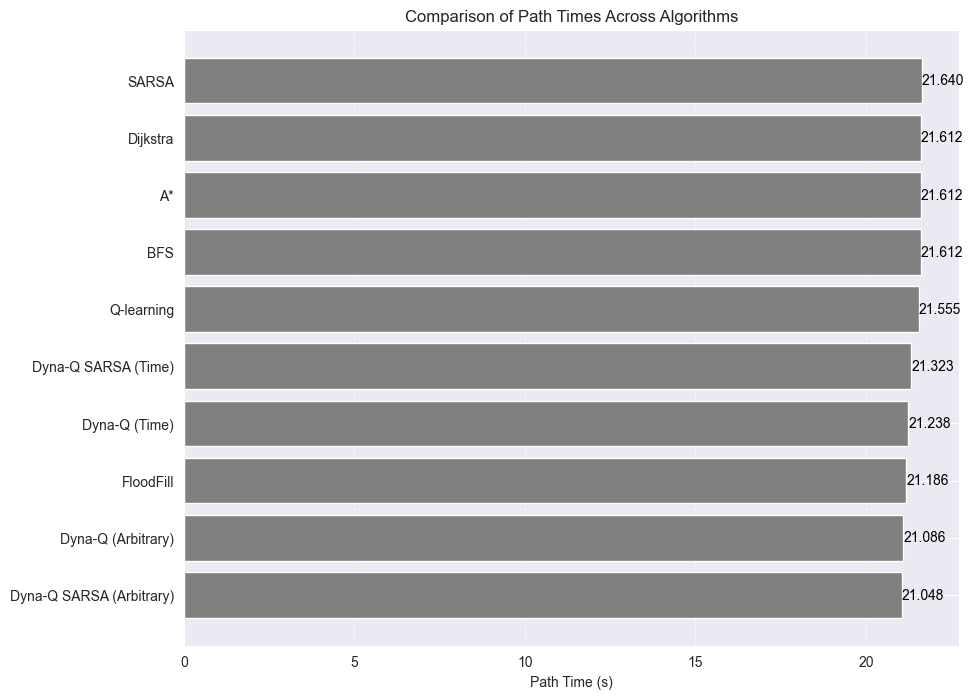

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Combine the data for path times
data = {
    'Algorithm': [
        'FloodFill', 'BFS', 'A*', 'Dijkstra', 
        'SARSA', 'Q-learning', 'Dyna-Q (Arbitrary)', 'Dyna-Q (Time)', 
        'Dyna-Q SARSA (Arbitrary)', 'Dyna-Q SARSA (Time)'
    ],
    'Path Time (s)': [
        df_flood_fill['Path Time (s)'].mean(),
        df_bfs['Path Time (s)'].mean(),
        df_astar['Path Time (s)'].mean(),
        df_dijkstra['Path Time (s)'].mean(),
        df_sarsa['Path Time (s)'].mean(),
        df_qlearning['Path Time (s)'].mean(),
        df_dyna_qlearning_arbt['Path Time (s)'].mean(),
        df_dyna_qlearning_time['Path Time (s)'].mean(),
        df_dynaq_sarsa_arbt['Path Time (s)'].mean(),
        df_dynaq_sarsa_time['Path Time (s)'].mean()
    ]
}

# Create a DataFrame
df_combined = pd.DataFrame(data)

# Sort the DataFrame by 'Path Time (s)' for better visualization
df_combined.sort_values(by='Path Time (s)', ascending=True, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_combined['Algorithm'], df_combined['Path Time (s)'], color='gray')
plt.xlabel('Path Time (s)')
plt.title('Comparison of Path Times Across Algorithms')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with the path times (to 3 decimal places)
for index, value in enumerate(df_combined['Path Time (s)']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', color='black')

plt.show()


So whats the likelihood of doing better even though the mean is greater soemtimes? 

In [22]:
import pandas as pd

# Load your data
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill_time.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/dyna_q/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], df_dyna_qlearning_arbt[['Maze Name', 'Path Time (s)']],
                       on='Maze Name', suffixes=('_flood_fill', '_dyna_qlearning_arbt'))

df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']], on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']], on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']], on='Maze Name')

# Rename columns for clarity
df_combined.rename(columns={
    'Path Time (s)_dyna_qlearning_arbt': 'DynaQ_Learning_Arbt',
    'Path Time (s)': 'DynaQ_Learning_Time',
    'Path Time (s)_x': 'DynaQ_Sarsa_Arbt',
    'Path Time (s)_y': 'DynaQ_Sarsa_Time',
    'Path Time (s)_flood_fill': 'FloodFill'}, inplace=True)

# Count the number of times any of the algorithms performed better or the same as FloodFill
count_better = 0
bad = []
for _, row in df_combined.iterrows():
    if (
            # row['DynaQ_Learning_Arbt'] <= row['FloodFill'] or
        row['DynaQ_Learning_Time'] < row['FloodFill']):
        # row['DynaQ_Sarsa_Arbt'] <= row['FloodFill'] or
        # row['DynaQ_Sarsa_Time'] <= row['FloodFill']):
            print(f'dyna: {row}')
            count_better += 1
# Calculate the probability
probability_better = count_better / len(df_combined)

print(f"The probability that any of the Dyna-Q algorithms performed better than FloodFill is {probability_better:.2f}, count = {count_better}")
print(bad)


dyna: Maze Name                     50
FloodFill              25.878193
DynaQ_Learning_Arbt    27.575872
DynaQ_Sarsa_Arbt       27.575872
DynaQ_Sarsa_Time       24.613396
DynaQ_Learning_Time    25.429256
Name: 1, dtype: object
dyna: Maze Name                  87sin
FloodFill              14.794908
DynaQ_Learning_Arbt    13.623074
DynaQ_Sarsa_Arbt       13.036416
DynaQ_Sarsa_Time       14.794908
DynaQ_Learning_Time    14.305615
Name: 3, dtype: object
dyna: Maze Name              AAMC22Maze
FloodFill               16.230482
DynaQ_Learning_Arbt     16.230482
DynaQ_Sarsa_Arbt        16.230482
DynaQ_Sarsa_Time        16.230482
DynaQ_Learning_Time     14.632944
Name: 11, dtype: object
dyna: Maze Name              allamerica2013
FloodFill                    10.98125
DynaQ_Learning_Arbt         12.464055
DynaQ_Sarsa_Arbt            12.174852
DynaQ_Sarsa_Time            14.606158
DynaQ_Learning_Time         10.583826
Name: 15, dtype: object
dyna: Maze Name              alljapan-005-1984
FloodFi

The results show that there is a 34% chance that the RL algorithm with the dynamic reward system would perform better than FloodFill, and a 30% chance that it would give the same result. This equates to a 64% probability of performing better or at least the same.
When running both algorithms that use the dynamic reward structure, the probability of performing better increases to 44%, with an 86% chance of being better or the same. If we consider all four algorithms, the probability rises to 50% for performing better and 92% for being better or the same.
These results align with our expectations. While the mean and median differences may not be significant in the discussion, they do highlight that when the algorithms fail, they tend to get stuck in local minima.
Thanks again for your continued support.
Best regards,
Faris